C:\Users\Tang Ying Kin\Anaconda3\lib\site-packages\ipykernel_launcher.py:67: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


['win_odds' 'declared_horse_weight' 'actual_weight' 'draw'
 'recent_ave_rank' 'race_distance' 'jockey_ave_rank' 'trainer_ave_rank'] [ 0.24377273  0.21176118  0.1478115   0.11309067  0.10744109  0.0846291
  0.06010877  0.03138497]


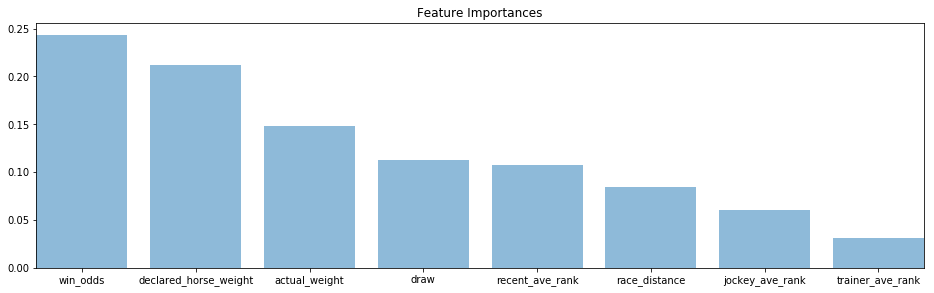

In [34]:
import os
import csv
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from matplotlib.ticker import MaxNLocator

def get_list(df = [] , col_type = ''):
    list_set = np.empty(0)
    for index, row in df.iterrows():
        #print(row[col_type])
        if not row[col_type] in list_set:
            list_set = np.append(list_set , row[col_type])
    return list_set

def get_data(name = ''):
    df = ""
    path = os.getcwd()
    direct='data'
    file=os.path.join(path,direct, name)
    #opencsv=""
    try:
        opencsv = open(os.path.join(path,direct,name), 'r')
        #print(opencsv)#find the race-result-horse file
    except:
        while opencsv != name:  # if the file cant be found if there is an error
            print("Could not open ", "file")
            opencsv = input("\nPlease try to open file again: ")
    else:
        with open(os.path.join(path,direct,name)) as f:
            feature_names = []#f.readline()
            #print(feature_names)
            reader = csv.reader(f)
            for row in reader:
                feature_names = row
                #print(feature_names)
                break
            df =  pd.read_csv(open(os.path.join(path,direct,name)), header=None, names = feature_names) #, na_values = ['WV-A' , 'WV'])
            df.drop(0, inplace = True)
    return df

def plot_bar_chart():
    df = get_data('training.csv')
    
    mapping = np.array(list(map(int,df.loc[:,['finishing_position']].values.ravel())))
    df.loc[:,['finishing_position']] = mapping.reshape(-1,1)
    
    features = ['actual_weight' , 'declared_horse_weight' , 'draw' , 'win_odds' , 'jockey_ave_rank'
                                  ,'trainer_ave_rank' , 'recent_ave_rank' , 'race_distance']
    
    X_train_src = df.loc[:, features ]
    #print(X_train_src)
    
    y_train_src = df.loc[:, ['finishing_position'] ]
    
    X_scaler = StandardScaler()
    
    X = X_scaler.fit_transform(X_train_src)
    
    y = X_scaler.fit_transform(y_train_src).astype(int)
    
    forest = RandomForestClassifier()
    
    forest.fit(X,y)
    
    index = np.array(range(7))
    
    importances = forest.feature_importances_
    
    index = np.argsort(importances)[::-1]
    
    features = np.array([features[x] for x in index])
    
    importances = np.array([importances[x] for x in index])
    
    print(features , importances)
    
    plt.bar(np.arange(features.shape[0]), importances, align='center', alpha=0.5)
    
    plt.xticks(np.arange(features.shape[0]) , features)
    
    #plt.gca().xaxis.set_major_locator(MaxNLocator(prune='lower'))
    
    plt.tight_layout()
    
    plt.gca().margins(x=0)
    plt.gcf().canvas.draw()
    tl = plt.gca().get_xticklabels()
    maxsize = max([t.get_window_extent().width for t in tl])
    m = 0.2 # inch margin
    s = maxsize/plt.gcf().dpi*features.shape[0]+2*m
    margin = m/plt.gcf().get_size_inches()[0]

    plt.gcf().subplots_adjust(left=margin, right=1.-margin)
    plt.gcf().set_size_inches(s, plt.gcf().get_size_inches()[1])
    plt.title('Feature Importances')
    plt.show()
    
    
    
    

if __name__ == '__main__':
    
    plot_bar_chart()